In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 100
np.set_printoptions(precision=3, suppress=True)
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas.tools.plotting import scatter_matrix

In [2]:
data = pd.read_csv("/Users/van/Desktop/Didi_Research/ShangHai_Data.csv")

In [3]:
data_22 = pd.read_csv("/Users/van/Desktop/Didi_Research/odcleaned/odcleaned_gulf_22.txt")
data_23 = pd.read_csv("/Users/van/Desktop/Didi_Research/odcleaned/odcleaned_gulf_23.txt")
data_24 = pd.read_csv("/Users/van/Desktop/Didi_Research/odcleaned/odcleaned_gulf_24.txt")

In [4]:
frames = [data_22, data_23, data_24]
data_cleaned = pd.concat(frames)

In [5]:
data_cleaned.shape

(151043, 9)

In [6]:
data.shape

(171355, 17)

In [7]:
data

,Unnamed: 0,order_id,city,start_long,start_lat,end_long,end_lat,start_time,end_time,type,label,Hours,shared,start_region,end_region,distance,travel_time
0,1,2f0ef629f4598e8e8de3e86d368f3f62,上海市,121.472954,31.241369,121.419890,31.231510,2016-12-22 00:07:41,2016-12-22 00:24:57,gulf,0.000000e+00,0,0,76,76,0.002913,1036
1,2,f7027490d9285bc7c5093c362d1a93f3,上海市,121.480690,31.226961,121.375850,31.231050,2016-12-22 00:07:53,2016-12-22 00:32:22,gulf,0.000000e+00,0,0,76,76,0.011008,1469
2,3,a2bf16cc826ba72663df2e5233bc28f2,上海市,121.443430,31.251110,121.452950,31.182150,2016-12-22 00:06:15,2016-12-22 00:28:36,gulf,0.000000e+00,0,0,77,76,0.004846,1341
3,4,76a0d8a15dce38047ddb725fd56a1228,上海市,121.612870,31.205660,121.628760,31.187450,2016-12-22 00:05:42,2016-12-22 00:11:54,gulf,0.000000e+00,0,0,86,86,0.000584,372
4,5,eae2a33a5087a36172f3516970d116e3,上海市,121.421360,31.136290,121.422570,31.122310,2016-12-22 00:05:39,2016-12-22 00:14:38,gulf,0.000000e+00,0,0,76,76,0.000197,539
5,6,e0281366e86ae69b6bbbce7223fc6b2b,上海市,121.484580,31.235120,121.520570,31.294450,2016-12-22 00:09:32,2016-12-22 00:31:33,gulf,0.000000e+00,0,0,76,87,0.004815,1321
6,7,380d5c19f728abd84a698b5fb51000a3,上海市,121.510630,31.075320,121.542900,31.061670,2016-12-22 00:10:56,2016-12-22 00:21:14,gulf,0.000000e+00,0,0,86,86,0.001228,618
7,8,b1757c2a26cc2a70e1eba4ff92abf645,上海市,121.405000,31.102099,121.480650,31.223570,2016-12-22 00:21:32,2016-12-22 00:54:58,gulf,0.000000e+00,0,0,76,76,0.020478,2006
8,9,d7017fb0ecca956f8aaf48e9e49d8079,上海市,121.506670,31.277030,121.529490,31.302070,2016-12-22 00:13:20,2016-12-22 00:40:30,gulf,0.000000e+00,0,0,87,87,0.001148,1630
9,10,eed11a47e8cbed7061f9d60c28c6fd38,上海市,121.536540,31.300710,121.541650,31.321550,2016-12-22 00:15:36,2016-12-22 00:19:56,gulf,0.000000e+00,0,0,87,87,0.000460,260


In [94]:
data_cleaned

,Order_ID,Ori_OX,Ori_OY,Ori_Time,Des_OX,Des_OY,Des_Time,Pathlen,Pathtime
0,021c5e1c33440a869125c4d5c7b76adc,43462.353080,25827.573882,1482387135,43027.264020,27567.345502,1482387677,2445.734644,542
1,0220a6e3bb69a89f6e3034a75a06e5a1,52676.056203,25299.742997,1482409061,54471.587698,28144.068704,1482409627,4115.057982,566
2,022142c4cdd810f22192e80927660ee6,41449.972093,32571.165664,1482408803,39747.078175,31577.997392,1482409319,2323.797380,516
3,0222ce0dc91ac607e972c27a65c4d1bb,37089.779811,23769.678242,1482395189,39782.632772,21929.921227,1482396257,4389.495264,1068
4,02233d49cde76d89cae4bf8e6ae5a217,39647.013873,20121.493637,1482386753,41330.531784,21814.408102,1482388403,3854.209392,1650
5,022550d10faacb0b64b6e23e020db554,39118.936366,19496.189904,1482408181,40660.724967,25272.585016,1482409331,8708.270578,1150
6,0225640fc428de7d67c569bba792bbc7,48065.651635,33912.334051,1482395991,48852.394883,32666.029015,1482396477,1607.980625,486
7,0225af45652148d8cda0078b81b45768,26442.599346,46175.450417,1482366645,23569.372139,41837.969519,1482368237,10130.926962,1592
8,02267edbfcda1dc548e51ae56bda8003,43042.774874,25822.332452,1482405377,42585.898819,27556.574245,1482406151,2249.868472,774
9,022a2549ffc64784574e6a01918cc3a7,16769.659246,49206.168812,1482401691,21241.391073,41780.936896,1482402823,8731.100103,1132


In [8]:
data = data.merge(data_cleaned,how='inner', left_on='order_id', right_on='Order_ID')

In [9]:
data.shape

(151043, 26)

In [10]:
data.iloc[0,]

Unnamed: 0                                     1
order_id        2f0ef629f4598e8e8de3e86d368f3f62
city                                         上海市
start_long                               121.473
start_lat                                31.2414
end_long                                  121.42
end_lat                                  31.2315
start_time                   2016-12-22 00:07:41
end_time                     2016-12-22 00:24:57
type                                        gulf
label                                          0
Hours                                          0
shared                                         0
start_region                                  76
end_region                                    76
distance                              0.00291299
travel_time                                 1036
Order_ID        2f0ef629f4598e8e8de3e86d368f3f62
Ori_OX                                   39051.3
Ori_OY                                   26671.4
Ori_Time            

In [11]:
x = data[['start_time','end_time','Hours','travel_time','Ori_OX','Ori_OY','Des_OX','Des_OY','Pathlen']]
y = data['shared']

In [12]:
# get the shape file
import shapefile as shp
from shapely.geometry import Point
from shapely.geometry import shape
import pandas as pd

##
sf = shp.Reader("/Users/van/Desktop/Didi_Research/zone/zone")
shapes = sf.shapes() # get all the polygons
all_records = pd.DataFrame(sf.records())
all_records["id"] = range(1,510)
def find_region(x, y):
    for i in range(len(shapes)):
        boundary = shapes[i] # get a boundary polygon
        if Point((x,y)).within(shape(boundary)): # make a point and see if it's in the polygon
            return all_records.loc[i]['id']
    return -1

In [119]:
x.iloc[0]

start_time     2016-12-22 00:07:41
end_time       2016-12-22 00:24:57
Hours                            0
travel_time                   1036
Ori_OX                     39051.3
Ori_OY                     26671.4
Des_OX                     39449.7
Des_OY                       25803
Pathlen                    1082.96
Name: 0, dtype: object

In [120]:
x.iloc[0][4]

39051.340849251901

In [128]:
play = x.iloc[0:100,]

In [123]:
play

,start_time,end_time,Hours,travel_time,Ori_OX,Ori_OY,Des_OX,Des_OY,Pathlen
0,2016-12-22 00:07:41,2016-12-22 00:24:57,0,1036,39051.340849,26671.445749,39449.730880,25802.955701,1082.957369
1,2016-12-22 00:07:41,2016-12-22 00:24:57,0,1036,44513.546096,26852.380532,39057.043118,26682.488886,8120.812001
2,2016-12-22 00:07:41,2016-12-22 00:24:57,0,1036,44484.949626,26913.083925,39449.730880,25802.955701,9383.549783
3,2016-12-22 00:07:41,2016-12-22 00:24:57,0,1036,44472.557287,26934.046979,39449.730880,25802.955701,9087.065168
4,2016-12-22 00:07:41,2016-12-22 00:24:57,0,1036,44472.557287,26934.046979,39449.730880,25802.955701,9263.487417
5,2016-12-22 00:10:56,2016-12-22 00:21:14,0,618,48259.918827,8543.438829,49745.463839,7406.935570,3909.950910
6,2016-12-22 00:10:56,2016-12-22 00:21:14,0,618,48259.918827,8543.438829,49757.855349,7413.627151,3773.112677
7,2016-12-22 00:10:56,2016-12-22 00:21:14,0,618,48377.216332,8584.919108,49746.416371,7408.045415,3919.596296
8,2016-12-22 00:10:56,2016-12-22 00:21:14,0,618,48259.918827,8543.438829,49867.505388,7441.790211,3969.533225
9,2016-12-22 00:17:51,2016-12-22 00:32:03,0,852,34317.684315,25959.783592,28820.478625,27564.816387,6891.470513


In [15]:
data

,Unnamed: 0,order_id,city,start_long,start_lat,end_long,end_lat,start_time,end_time,type,...,travel_time,Order_ID,Ori_OX,Ori_OY,Ori_Time,Des_OX,Des_OY,Des_Time,Pathlen,Pathtime
0,1,2f0ef629f4598e8e8de3e86d368f3f62,上海市,121.472954,31.241369,121.419890,31.231510,2016-12-22 00:07:41,2016-12-22 00:24:57,gulf,...,1036,2f0ef629f4598e8e8de3e86d368f3f62,39051.340849,26671.445749,1482337287,39449.730880,25802.955701,1482337491,1082.957369,204
1,1,2f0ef629f4598e8e8de3e86d368f3f62,上海市,121.472954,31.241369,121.419890,31.231510,2016-12-22 00:07:41,2016-12-22 00:24:57,gulf,...,1036,2f0ef629f4598e8e8de3e86d368f3f62,44513.546096,26852.380532,1482336493,39057.043118,26682.488886,1482337265,8120.812001,772
2,1,2f0ef629f4598e8e8de3e86d368f3f62,上海市,121.472954,31.241369,121.419890,31.231510,2016-12-22 00:07:41,2016-12-22 00:24:57,gulf,...,1036,2f0ef629f4598e8e8de3e86d368f3f62,44484.949626,26913.083925,1482336481,39449.730880,25802.955701,1482337479,9383.549783,998
3,1,2f0ef629f4598e8e8de3e86d368f3f62,上海市,121.472954,31.241369,121.419890,31.231510,2016-12-22 00:07:41,2016-12-22 00:24:57,gulf,...,1036,2f0ef629f4598e8e8de3e86d368f3f62,44472.557287,26934.046979,1482336469,39449.730880,25802.955701,1482337497,9087.065168,1028
4,1,2f0ef629f4598e8e8de3e86d368f3f62,上海市,121.472954,31.241369,121.419890,31.231510,2016-12-22 00:07:41,2016-12-22 00:24:57,gulf,...,1036,2f0ef629f4598e8e8de3e86d368f3f62,44472.557287,26934.046979,1482336463,39449.730880,25802.955701,1482337485,9263.487417,1022
5,7,380d5c19f728abd84a698b5fb51000a3,上海市,121.510630,31.075320,121.542900,31.061670,2016-12-22 00:10:56,2016-12-22 00:21:14,gulf,...,618,380d5c19f728abd84a698b5fb51000a3,48259.918827,8543.438829,1482336657,49745.463839,7406.935570,1482337271,3909.950910,614
6,7,380d5c19f728abd84a698b5fb51000a3,上海市,121.510630,31.075320,121.542900,31.061670,2016-12-22 00:10:56,2016-12-22 00:21:14,gulf,...,618,380d5c19f728abd84a698b5fb51000a3,48259.918827,8543.438829,1482336663,49757.855349,7413.627151,1482337253,3773.112677,590
7,7,380d5c19f728abd84a698b5fb51000a3,上海市,121.510630,31.075320,121.542900,31.061670,2016-12-22 00:10:56,2016-12-22 00:21:14,gulf,...,618,380d5c19f728abd84a698b5fb51000a3,48377.216332,8584.919108,1482336693,49746.416371,7408.045415,1482337259,3919.596296,566
8,7,380d5c19f728abd84a698b5fb51000a3,上海市,121.510630,31.075320,121.542900,31.061670,2016-12-22 00:10:56,2016-12-22 00:21:14,gulf,...,618,380d5c19f728abd84a698b5fb51000a3,48259.918827,8543.438829,1482336675,49867.505388,7441.790211,1482337235,3969.533225,560
9,17,18afc883968ba5dbe2f61ac7fd0688c4,上海市,121.365540,31.232550,121.310905,31.245234,2016-12-22 00:17:51,2016-12-22 00:32:03,gulf,...,852,18afc883968ba5dbe2f61ac7fd0688c4,34317.684315,25959.783592,1482337081,28820.478625,27564.816387,1482337915,6891.470513,834


In [17]:
data.shape

(151043, 26)

In [19]:
x = data[['start_time','end_time','Hours','travel_time','Ori_OX','Ori_OY','Des_OX','Des_OY','Pathlen','shared']]



In [21]:
play = x.iloc[0:100,]

In [24]:
x['start_region'] = x.apply (lambda row: find_region(row[4],row[5]),axis=1)

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
x

,start_time,end_time,Hours,travel_time,Ori_OX,Ori_OY,Des_OX,Des_OY,Pathlen,shared,start_region
0,2016-12-22 00:07:41,2016-12-22 00:24:57,0,1036,39051.340849,26671.445749,39449.730880,25802.955701,1082.957369,0,23
1,2016-12-22 00:07:41,2016-12-22 00:24:57,0,1036,44513.546096,26852.380532,39057.043118,26682.488886,8120.812001,0,53
2,2016-12-22 00:07:41,2016-12-22 00:24:57,0,1036,44484.949626,26913.083925,39449.730880,25802.955701,9383.549783,0,53
3,2016-12-22 00:07:41,2016-12-22 00:24:57,0,1036,44472.557287,26934.046979,39449.730880,25802.955701,9087.065168,0,53
4,2016-12-22 00:07:41,2016-12-22 00:24:57,0,1036,44472.557287,26934.046979,39449.730880,25802.955701,9263.487417,0,53
5,2016-12-22 00:10:56,2016-12-22 00:21:14,0,618,48259.918827,8543.438829,49745.463839,7406.935570,3909.950910,0,405
6,2016-12-22 00:10:56,2016-12-22 00:21:14,0,618,48259.918827,8543.438829,49757.855349,7413.627151,3773.112677,0,405
7,2016-12-22 00:10:56,2016-12-22 00:21:14,0,618,48377.216332,8584.919108,49746.416371,7408.045415,3919.596296,0,405
8,2016-12-22 00:10:56,2016-12-22 00:21:14,0,618,48259.918827,8543.438829,49867.505388,7441.790211,3969.533225,0,405
9,2016-12-22 00:17:51,2016-12-22 00:32:03,0,852,34317.684315,25959.783592,28820.478625,27564.816387,6891.470513,0,55


In [26]:
x.to_csv('/Users/van/Desktop/Didi_Research/ShangHai_Data_new.csv')

In [ ]:
x['end_region'] = x.apply (lambda row: find_region(row[6],row[7]),axis=1)

In [ ]:
x = x.drop(['start_time','end_time'],axis=1)

In [5]:
# first feature matrix
# x_first = x[['start_long','start_lat','end_long','end_lat','Hours','distance']]

In [153]:
x['label'] = y

(151043, 8)

In [134]:
y = y.tolist()
y = [0 if i == 0 else 1 for i in y]

In [138]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [8]:
# lb = preprocessing.LabelBinarizer()
# y = lb.fit_transform(y)
# y=y.ravel()

In [9]:
# skfold=StratifiedKFold(n_splits=5,shuffle=True)
# lr=LogisticRegression()
# cross_val_score(lr,x_first,y,cv=skfold,scoring='roc_auc')

array([ 0.512,  0.513,  0.509,  0.518,  0.506])

In [155]:
x

,Hours,travel_time,Ori_OX,Ori_OY,Des_OX,Des_OY,Pathlen,start_region
0,0,1036,39051.340849,26671.445749,39449.730880,25802.955701,1082.957369,23
1,0,1036,44513.546096,26852.380532,39057.043118,26682.488886,8120.812001,53
2,0,1036,44484.949626,26913.083925,39449.730880,25802.955701,9383.549783,53
3,0,1036,44472.557287,26934.046979,39449.730880,25802.955701,9087.065168,53
4,0,1036,44472.557287,26934.046979,39449.730880,25802.955701,9263.487417,53
5,0,618,48259.918827,8543.438829,49745.463839,7406.935570,3909.950910,405
6,0,618,48259.918827,8543.438829,49757.855349,7413.627151,3773.112677,405
7,0,618,48377.216332,8584.919108,49746.416371,7408.045415,3919.596296,405
8,0,618,48259.918827,8543.438829,49867.505388,7441.790211,3969.533225,405
9,0,852,34317.684315,25959.783592,28820.478625,27564.816387,6891.470513,55


In [156]:
x = x[['Hours','travel_time','Pathlen','start_region']]

In [158]:
x_train_dummy = pd.DataFrame()
dum_cat = ['Hours']
for ele in (dum_cat):
    x_train_dummy = pd.concat([x_train_dummy,pd.get_dummies(x[ele], prefix=ele)],axis = 1)

In [159]:
x_first = pd.concat([x,x_train_dummy],axis = 1)

In [160]:
x.shape

(151043, 4)

In [161]:
x_first.shape

(151043, 28)

In [162]:
x_first = x_first.drop('Hours',axis=1)

In [163]:
x_first.shape

(151043, 27)

In [164]:
x_first

,travel_time,Pathlen,start_region,Hours_0,Hours_1,Hours_2,Hours_3,Hours_4,Hours_5,Hours_6,...,Hours_14,Hours_15,Hours_16,Hours_17,Hours_18,Hours_19,Hours_20,Hours_21,Hours_22,Hours_23
0,1036,1082.957369,23,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1036,8120.812001,53,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1036,9383.549783,53,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1036,9087.065168,53,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1036,9263.487417,53,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,618,3909.950910,405,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,618,3773.112677,405,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,618,3919.596296,405,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,618,3969.533225,405,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,852,6891.470513,55,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
cross_val_score(lr,x_first,y,cv=skfold,scoring='roc_auc',n_jobs = 5)

array([ 0.583,  0.582,  0.586,  0.595,  0.59 ])

In [172]:
# categorical variable hours, start_region
x_train_dummy = pd.DataFrame()
dum_cat = ['Hours','start_region']
for ele in (dum_cat):
    x_train_dummy = pd.concat([x_train_dummy,pd.get_dummies(x[ele], prefix=ele)],axis = 1)
x_second = pd.concat([x,x_train_dummy],axis = 1)
# x_second = x_first.drop(dum_cat,axis=1)

In [176]:
len(np.unique(x.start_region))

493

In [180]:
x_second = x_second.drop('Hours',axis=1)
x_second = x_second.drop('start_region',axis=1)

In [181]:
# 4 + 24 + 493 - 2
x_second.shape

(151043, 519)

In [230]:
cross_val_score(lr,x_second,y,cv=skfold,scoring='roc_auc',n_jobs = 5)

array([ 0.654,  0.648,  0.643,  0.641,  0.646])

In [216]:
len(np.unique(x.start_region))

493

<function matplotlib.pyplot.show>

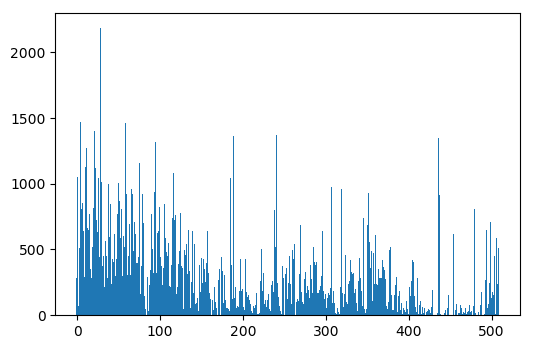

In [217]:
plt.hist(x.start_region,bins = 493)
plt.show

In [220]:
# remove columns has fewer than 1% data
def remove_columns(data_frame,threshold = 0.01):
    nrow = data_frame.shape[0]
    ncol = data_frame.shape[1]
    remove_num = nrow * threshold
    drop_col = []
    for i in range(1,ncol):
        if sum(data_frame.iloc[:,i]) <= remove_num:
            drop_col.append(i)
#             data_frame = data_frame.drop(data_frame.iloc[:,i],axis=1)
    data_frame = data_frame.drop(data_frame.iloc[:,drop_col],axis=1)
    return data_frame

In [221]:
x_third = remove_columns(x_second,0.001)

In [222]:
x_third.shape

(151043, 328)

In [224]:
len(y)

151043

In [225]:
cross_val_score(lr,x_third,y,cv=skfold,scoring='roc_auc',n_jobs = 5)

array([ 0.569,  0.563,  0.565,  0.571,  0.575])

In [239]:
l1_lr = LogisticRegression(penalty='l1')
cross_val_score(l1_lr,x_third,y,cv=skfold,scoring='roc_auc',n_jobs = 5)

array([ 0.64 ,  0.645,  0.636,  0.638,  0.641])

In [240]:
l2_lr = LogisticRegression(penalty='l2')

In [241]:
cross_val_score(l2_lr,x_third,y,cv=skfold,scoring='roc_auc',n_jobs = 5)

array([ 0.57 ,  0.563,  0.577,  0.569,  0.568])

In [226]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

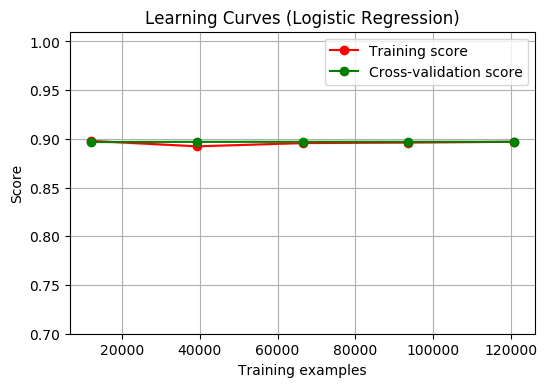

In [227]:
title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(estimator, title, x_third, y, ylim=(0.7, 1.01), cv=skfold, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"

plt.show()

## error analysis

In [270]:
x_train,x_test,y_train,y_test = train_test_split(x_third, y, test_size=0.2,stratify = y)
l1_lr = LogisticRegression(penalty = 'l1')
l1_lr.fit(x_train,y_train)
y_pred = l1_lr.predict(x_test)

In [271]:
target_names = ['non_shared', 'shared']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

 non_shared       0.90      1.00      0.95     27099
     shared       0.20      0.00      0.00      3110

avg / total       0.83      0.90      0.85     30209



In [272]:
sum(y_pred)

5

## Resampling

### Undersampling

In [273]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(replacement=False)
x_train_subsample, y_train_subsample = rus.fit_sample(x_train, y_train)
print(x_train.shape)
print(x_train_subsample.shape)
print(np.bincount(y_train_subsample))

(120834, 328)
(24880, 328)
[12440 12440]


In [278]:
from sklearn.linear_model import LogisticRegressionCV

In [280]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline

undersample_pipe = make_imb_pipeline(RandomUnderSampler(), LogisticRegressionCV())
scores = cross_val_score(undersample_pipe, x_third, y, cv=5, scoring='roc_auc')
print(np.mean(scores))

0.549566581809


In [274]:
# x_train,x_test,y_train,y_test = train_test_split(x_third, y, test_size=0.2,stratify = y)
l1_lr = LogisticRegression(penalty = 'l1')
l1_lr.fit(x_train_subsample,y_train_subsample)
y_pred = l1_lr.predict(x_test)
target_names = ['non_shared', 'shared']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

 non_shared       0.93      0.55      0.69     27099
     shared       0.14      0.62      0.22      3110

avg / total       0.85      0.56      0.64     30209



### Oversampling

In [282]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train_oversample, y_train_oversample = ros.fit_sample(x_third, y)
print(X_train_oversample.shape)
# print(np.bincount(y_train_oversample))

(270986, 328)


In [284]:
sum(y_train_oversample)

135493

In [285]:
cross_val_score(l1_lr,X_train_oversample,y_train_oversample,cv=skfold,scoring='roc_auc',n_jobs = 5)

array([ 0.652,  0.644,  0.647,  0.651,  0.651])